In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression


In [5]:
# lineair regression
lm = LinearRegression()
lm

LinearRegression()

In [6]:
# lm with highway-mpg and price
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [7]:
# prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.intercept_

38423.3058581574

In [9]:
lm.coef_

array([-821.73337832])

In [10]:
# price = 38423.31 - 821.73 x highway-mpg

In [11]:
# lm with engine-size and price
lm1 = LinearRegression()
lm1

LinearRegression()

In [12]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [13]:
lm1.intercept_

array([-7963.33890628])

In [14]:
lm1.coef_

array([[166.86001569]])

In [15]:
# price = -7963.34 + 166.86 x engine-size

In [16]:
# Multiple linear regression with horsepower, curb-weight, engine-sizem highway-mpg
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [17]:
lm.fit(Z, df['price'])

LinearRegression()

In [18]:
lm.intercept_

-15806.624626329227

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [20]:
# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [21]:
# Multiple linear regression with normalized-losses and highway-mpg


In [22]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']],df['price'])

LinearRegression()

In [23]:
lm2.intercept_


38201.31327245728

In [24]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [25]:
# Price = 38201.31327245728 + 1.49789586 x normalized-losses - 820.45434016 x highway-mpg 

In [26]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48177.81411266602)

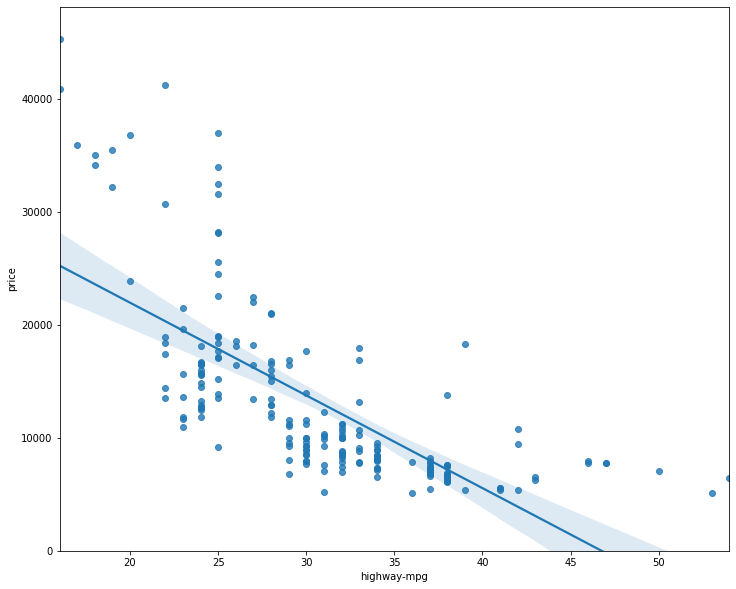

In [27]:
# visualize highway-mpg
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

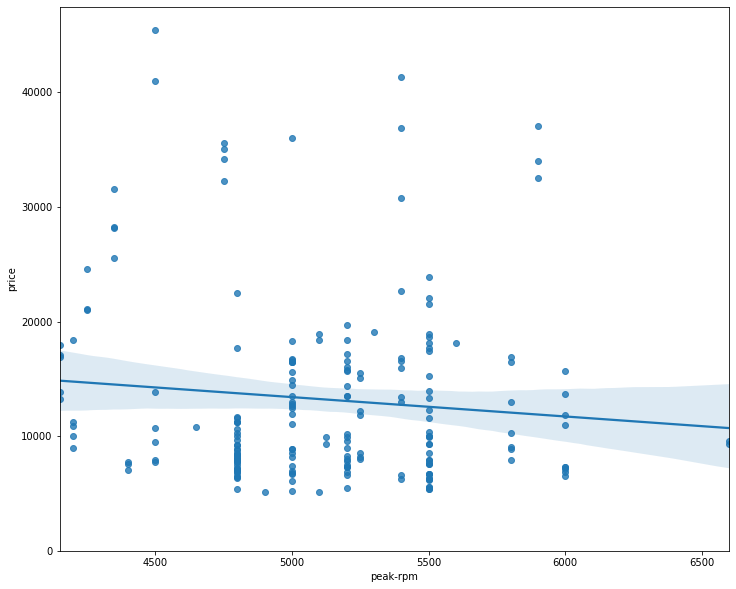

In [28]:
# visualize peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [29]:
# check correlation
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


c:\users\koenh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


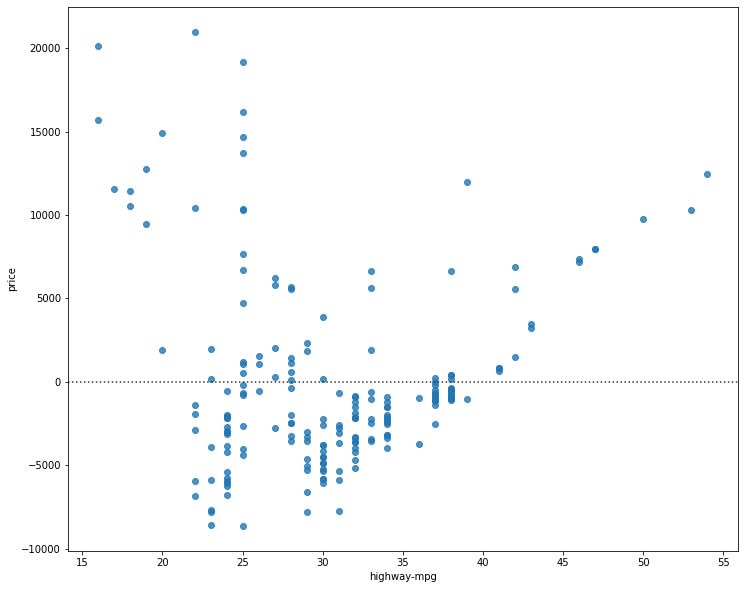

In [30]:
# residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [31]:
# MLM prediction
Y_hat = lm.predict(Z)

c:\users\koenh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\koenh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


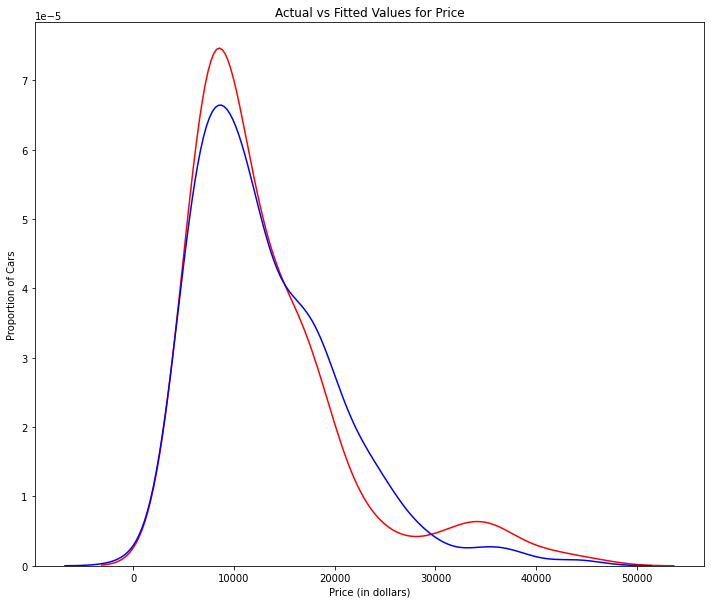

In [37]:
# distribution plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [39]:
# Polynomial regression and pipelines
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
# get variables
x = df['highway-mpg']
y = df['price']

In [41]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


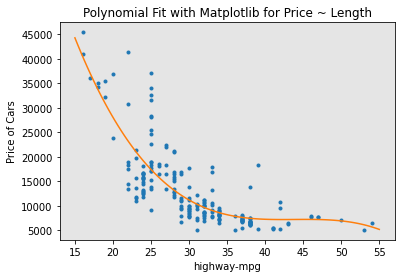

In [42]:
PlotPolly(p, x, y, 'highway-mpg')

In [43]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


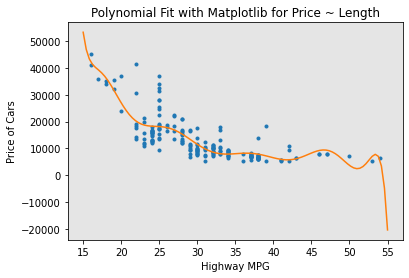

In [44]:
# 11 order polynomial
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# create Polynomialfeatures object of second degree
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [47]:
Z_pr=pr.fit_transform(Z)

In [48]:
Z.shape

(201, 4)

In [49]:
Z_pr.shape

(201, 15)

In [50]:
# PIPELINES


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [53]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
# normalize the data, perform a transform and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
# normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [56]:
# Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [57]:
# Measures for In-Sample Evaluation




In [59]:
# calculate R^2 ELR
lm.fit(X, Y)
lm.score(X, Y)

0.4965911884339176

In [60]:
# calculate MSE
Yhat=lm.predict(X)
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [61]:
from sklearn.metrics import mean_squared_error

In [63]:
mse = mean_squared_error(df['price'], Yhat)
mse

31635042.944639888

In [64]:
# calculate R^2 MLR
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [65]:
# prediction
Y_predict_multifit = lm.predict(Z)

In [66]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [67]:
# calculate R^2 Polynomial
from sklearn.metrics import r2_score

In [68]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [69]:
# calculate MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

In [70]:
# Prediction and Decision Making




In [71]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [72]:
# create new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [73]:
# fit the nodel
lm.fit(X, Y)
lm

LinearRegression()

In [74]:
# prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

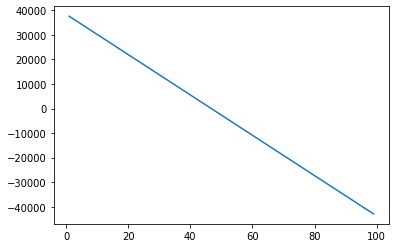

In [75]:
plt.plot(new_input, yhat)
plt.show()

In [76]:
# summary
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

SyntaxError: invalid syntax (<ipython-input-76-a65308ea1ce7>, line 2)